<a href="https://colab.research.google.com/github/mint-rin/SeSAC/blob/main/CNN_2_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),( x_test, y_test) = fmnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# 데이터 형태 확인
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# 샘플 데이터 확인

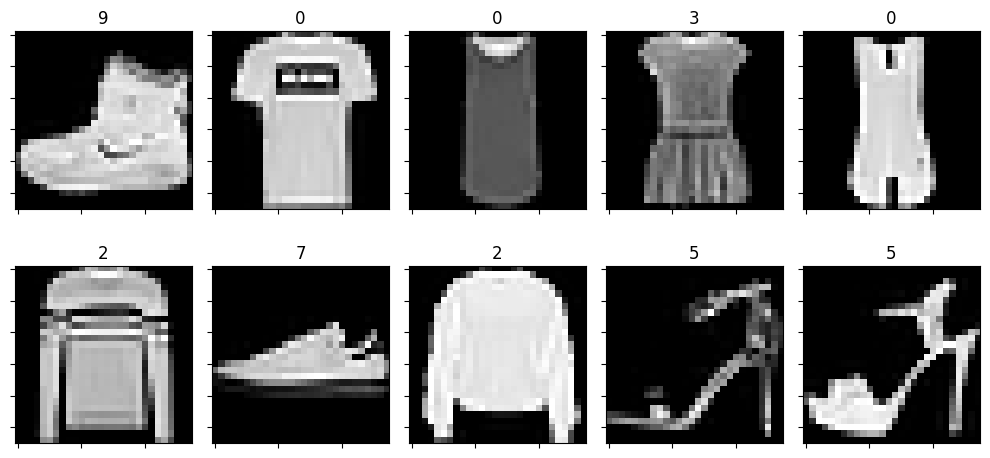

In [ ]:
import matplotlib.pyplot as plt

# 이미지 그릴 영역 설정
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)  # 크기 설정

for i in range(10):
  axes[i//5, i%5].imshow(x_train[i], cmap='gray')   # imshow: 이미지 데이터 확인
  axes[i//5, i%5].set_title(str(y_train[i]))
  plt.setp(axes[i//5, i%5].get_xticklabels(), visible=False)
  plt.setp(axes[i//5, i%5].get_yticklabels(), visible=False)

plt.tight_layout()  # 자동으로 여백 조정
plt.show()

# CNN

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# data normalization - reshape 필요
x_train = x_train.reshape(-1, 28, 28, 1)  # reshape(데이터 개수, 픽셀, 픽셀, 채널)  cf. 채널값: 흑백(1), 컬러(3)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
from tensorflow.keras import Model, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization

cnn = Sequential()

# Feature Extraction
cnn.add(layers.Conv2D(256, 3, strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPool2D(3, strides=2, padding='same'))
cnn.add(layers.Conv2D(128, 3, strides=1, padding='same', activation='relu'))
cnn.add(layers.MaxPool2D(3, strides=2, padding='same'))

# Classification
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dropout(0.25))
cnn.add(layers.Dense(10, activation='softmax'))   # 출력층, 카테고리가 3개 이상이어서 softmax

In [ ]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [ ]:
result = cnn.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 11s 19ms/step - loss: 1.3506 - acc: 0.4757 - val_loss: 0.7989 - val_acc: 0.7054
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.8521 - acc: 0.6732 - val_loss: 0.7066 - val_acc: 0.7269
Epoch 3/10
469/469 [==============================] - 8s 18ms/step - loss: 0.7702 - acc: 0.7079 - val_loss: 0.6611 - val_acc: 0.7516
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.7201 - acc: 0.7279 - val_loss: 0.6122 - val_acc: 0.7659
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 0.6885 - acc: 0.7402 - val_loss: 0.5901 - val_acc: 0.7781
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.6581 - acc: 0.7508 - val_loss: 0.5629 - val_acc: 0.7858
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.6331 - acc: 0.7588 - val_loss: 0.5404 - val_acc: 0.8003
Epoch 8/10
469/469 [==============================] - 7s 16ms/step -

In [ ]:
test_result = cnn.evaluate(x_test, y_test)
print('test loss: ', test_result[0])
print('test acc: ', test_result[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.4751 - acc: 0.8226
test loss:  0.47514867782592773
test acc:  0.8226000070571899
